# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_displacement_profile

# View the docstrings

In [3]:
help(run_displacement_profile)

Help on module run_displacement_profile:

NAME
    run_displacement_profile

DESCRIPTION
    This file runs the KEA23 displacement model to create a slip profile.
    - The mean model (i.e., mean coefficients) is used.
    - The results are returned in a pandas DataFrame.
    - Results for left-peak, right-peak, and folded (symmetrical) profiles are always returned.
    - Command-line use is supported; try `python run_displacement_profile.py --help`
    - Module use is supported; try `from run_displacement_profile import run_profile`
    
    # NOTE: This script just calls `run_displacement_model.py`
    
    Reference: https://doi.org/10.1177/ToBeAssigned

FUNCTIONS
    main()
    
    run_profile(*, magnitude: Union[float, int, List[Union[float, int]], numpy.ndarray], style: Union[str, List[str], numpy.ndarray], percentile: Union[float, int, List[Union[float, int]], numpy.ndarray], location_step: float = 0.05) -> pandas.core.frame.DataFrame
        Run KEA23 displacement model to cre

# Run profile

## Single scenarios

A single scenario is defined as a magnitude/percentile/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
mag, sof, perc = 6.8, "strike-slip", 0.5

results = run_displacement_profile.run_profile(magnitude=mag, style=sof, percentile=perc)

results.head()

magnitude  location        style  percentile  model_number    lambda   mu_site  sigma_site  mu_complement  sigma_complement    Y_site  Y_complement  Y_folded  displ_site  displ_complement  displ_folded
0        6.8      0.00  strike-slip         0.5            -1  0.161345 -1.737010    0.967282      -1.737010          1.059444 -1.737010     -1.737010 -1.737010    0.130256          0.130256      0.130256
1        6.8      0.05  strike-slip         0.5            -1  0.161345 -1.177054    0.930610      -1.406539          1.011786 -1.177054     -1.406539 -1.291796    0.271077          0.202845      0.234890
2        6.8      0.10  strike-slip         0.5            -1  0.161345 -0.823608    0.898989      -1.120755          0.969558 -0.823608     -1.120755 -0.972182    0.413243          0.290474      0.347332
3        6.8      0.15  strike-slip         0.5            -1  0.161345 -0.550346    0.872207      -0.867231          0.932588 -0.550346     -0.867231 -0.708789    0.561957          0.392887      0.471094
4        6.8      0.20  strike-slip         0.5            -1  0.161345 -0.335463    0.850046      -0.643606          0.900681 -0.335463     -0.643606 -0.489534    0.708304          0.506854      0.600526

The default location spacing is 0.05, but it can be changed with `location_step=0.01`, for example:

In [5]:
results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc, location_step=0.01
)

results.head()

magnitude  location        style  percentile  model_number    lambda   mu_site  sigma_site  mu_complement  sigma_complement    Y_site  Y_complement  Y_folded  displ_site  displ_complement  displ_folded
0        6.8      0.00  strike-slip         0.5            -1  0.161345 -1.737010    0.967282      -1.737010          1.059444 -1.737010     -1.737010 -1.737010    0.130256          0.130256      0.130256
1        6.8      0.01  strike-slip         0.5            -1  0.161345 -1.571210    0.959534      -1.664203          1.049471 -1.571210     -1.664203 -1.617707    0.163315          0.144004      0.153405
2        6.8      0.02  strike-slip         0.5            -1  0.161345 -1.454913    0.951994      -1.596506          1.039720 -1.454913     -1.596506 -1.525709    0.190480          0.157859      0.173528
3        6.8      0.03  strike-slip         0.5            -1  0.161345 -1.353641    0.944661      -1.531306          1.030189 -1.353641     -1.531306 -1.442473    0.217129          0.172244      0.193598
4        6.8      0.04  strike-slip         0.5            -1  0.161345 -1.261838    0.937533      -1.468068          1.020879 -1.261838     -1.468068 -1.364953    0.243922          0.187229      0.214006

And the profiles can be plotted:

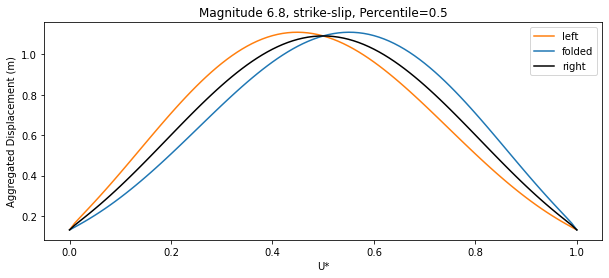

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, d_left, d_right, d_folded = (
    results["location"],
    results["displ_site"],
    results["displ_complement"],
    results["displ_folded"],
)
ax.plot(x, d_left, c="tab:orange", label="left")
ax.plot(x, d_right, c="tab:blue", label="folded")
ax.plot(x, d_folded, c="k", label="right")
title = f"Magnitude {mag}, {sof}, Percentile={perc}"
ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)", title=title)
ax.legend(loc="best");

## Multiple scenarios

Because the profiles are based on the mean model coefficients (this is hard-coded in `run_displacement_profile.py`), multiple mangitudes, styles, or percentiles can be run.

In [7]:
mag, perc, sof = (
    [6.8],
    [0.5, 0.84, -1],
    ["reverse", "strike-slip"],
)

results = run_displacement_profile.run_profile(magnitude=mag, style=sof, percentile=perc)

display(results.head())
display(results.tail())

magnitude  location    style  percentile  model_number    lambda   mu_site  sigma_site  mu_complement  sigma_complement    Y_site  Y_complement  Y_folded  displ_site  displ_complement  displ_folded
0        6.8      0.00  reverse        -1.0            -1  0.117785 -0.789419    0.817701      -0.789419          1.022360 -0.506444     -0.375069 -0.440756    0.593227          0.681400      0.635967
1        6.8      0.05  reverse        -1.0            -1  0.117785  0.152052    0.813638      -0.643467          0.996500  0.408520     -0.251391  0.078564    1.490327          0.774771      1.081342
2        6.8      0.10  reverse        -1.0            -1  0.117785  0.216780    0.811021      -0.539074          0.972461  0.470250     -0.166215  0.152017    1.580417          0.845469      1.162616
3        6.8      0.15  reverse        -1.0            -1  0.117785  0.235780    0.809840      -0.447545          0.950217  0.488145     -0.091964  0.198091    1.607416          0.911681      1.216302
4        6.8      0.20  reverse        -1.0            -1  0.117785  0.233121    0.810093      -0.364303          0.929738  0.485690     -0.024299  0.230695    1.603687          0.975960      1.255604

magnitude  location        style  percentile  model_number    lambda   mu_site  sigma_site  mu_complement  sigma_complement    Y_site  Y_complement  Y_folded  displ_site  displ_complement  displ_folded
121        6.8      0.80  strike-slip        0.84            -1  0.161345 -0.643606    0.900681      -0.335463          0.850046  0.252083      0.509872  0.380978    1.280297          1.632289      1.447340
122        6.8      0.85  strike-slip        0.84            -1  0.161345 -0.867231    0.932588      -0.550346          0.872207  0.060188      0.317027  0.188608    1.061728          1.362315      1.204175
123        6.8      0.90  strike-slip        0.84            -1  0.161345 -1.120755    0.969558      -0.823608          0.898989 -0.156571      0.070399 -0.043086    0.853352          1.072510      0.957685
124        6.8      0.95  strike-slip        0.84            -1  0.161345 -1.406539    1.011786      -1.177054          0.930610 -0.400360     -0.251602 -0.325981    0.661083          0.773483      0.715434
125        6.8      1.00  strike-slip        0.84            -1  0.161345 -1.737010    1.059444      -1.737010          0.967282 -0.683438     -0.775089 -0.729263    0.484741          0.436915      0.460308

And we can plot the different scenarios:

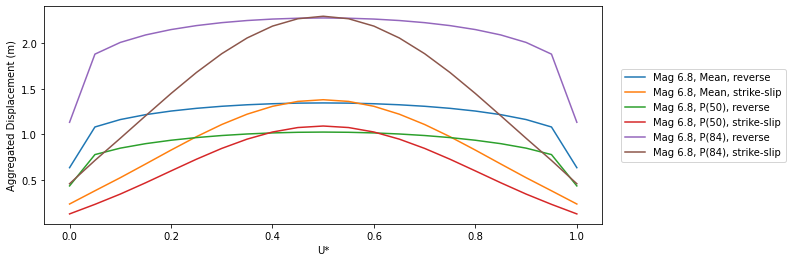

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for scenario, group in results.groupby(["magnitude", "percentile", "style"]):
    m, p, s = scenario[0], scenario[1], scenario[2]
    x, y = group["location"], group["displ_folded"]
    p_lab = "Mean" if p == -1 else f"P({int(p*100)})"
    label = f"Mag {m}, {p_lab}, {s}"
    ax.plot(x, y, label=label)

ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)")
ax.legend(loc="center left", bbox_to_anchor=(1.025, 0.5));

# Scratch

In [9]:
mag, perc, sof = (
    [6.8],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(magnitude=mag, style=sof, percentile=perc)

for x in ["displ_site", "displ_complement", "displ_folded"]:
    print(np.trapz(results[x], results["location"]))


mag, perc, sof = (
    [7.2],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(magnitude=mag, style=sof, percentile=perc)

for x in ["displ_site", "displ_complement", "displ_folded"]:
    print(np.trapz(results[x], results["location"]))

1.2537633811315114
1.2537633811315114
1.2301318011654612
1.8449804101095508
1.844980410109551
1.8128000474623929


In [10]:
mag, perc, sof = (
    [6.8, 7.2],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(magnitude=mag, style=sof, percentile=perc)

grouped = results.groupby("magnitude")
areas = {name: np.trapz(group["displ_site"], group["location"]) for name, group in grouped}

areas_df = pd.DataFrame(list(areas.items()), columns=["x", "area"])

areas_df

x      area
0  6.8  1.253763
1  7.2  1.844980